Mid-Project 
Regression

# Import Libralies

In [38]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_excel('regression_data.xls')

# 2. Reading data

In [40]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


# 2. EDA | Explore the data

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [42]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [43]:
data.shape

(21597, 21)

Descriptive Statistics
Describe the numerical variables

In [44]:
data.describe(include=[np.number])

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [45]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

3. Data Cleaning
Check missing values

In [46]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

Check for nulls

In [47]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

Check for duplicates

In [48]:
data.duplicated().sum()

0

There are no duplicates rows,but one house could be sold multiple times,therefore house can appear more than once in our data.

In [49]:
# Searching for duplicate ids
data['id'].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

Checking How many repeated houses we have or how many duplicated 'id'

In [50]:
(data['id'].value_counts() >1).sum()

176

Starting with the id 795000620 that is 3 times repeated

In [51]:
data[data['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


This house was sold in 3 different dates and with 3 different prices. This is not a problem for our analysis, as we want to predict the price of houses regarding different features such as the year when was sold, so we don't need to drop or modify these rows.

Analysing the categorical columns
using a function showing characters of all the categorical columns: bedrooms, bathrooms, floors, waterfront, view, condition, grade and zipcode.

Changing the selected columns to object type


In [52]:
data[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']] = data[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition','grade','zipcode']]

Checking the types

In [53]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

Each categorical column, print: column name, unique values, number of unique values (%)

In [54]:
categorical=[column for column in data.columns if (data[column].dtype==object)] 
for i in categorical:
    print ('Column: {}'.format(data[i].name)) 
    print('Unique values: {}'.format(len(data[i].unique()))) 
    print(data[i].unique())
    print(data[i].value_counts())
    print(f"{round(data[i].value_counts()/sum(data[i].value_counts())*100,2)}")
    print('\n----------')    

Analyse column bedrooms
We see a single property with 33 bedrooms, could be an error, let's check the area of the house.

In [55]:
data[data['bedrooms'] == 33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


33 bedrooms can be a hostel, in 1 single floor and with around 100 sqm has to be an error because it's physically unlikely. It seems to be a typo and it is actually 3 bedrooms.

Correcting an error 33 bedrooms

In [56]:
data.loc[data['bedrooms'] == 33, 'bedrooms'] = 3

Checking if the correction was done correctly.

In [57]:
data['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

Property with 11 bedrooms, all the data makes sense. 

In [58]:
data[data['bedrooms'] == 11]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8748,1773100755,2014-08-21,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960,520000


In [59]:
#Let's check the higher unique values of bathrooms too.
data[data['bathrooms'] == 8.0]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
12764,1225069038,2014-05-05,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000


Analyse the column yr_renovated

#We want to see the percentage of renovated houses

In [60]:
# We want to see the percentage of renovated houses
print(f" Percentage of renovated houses = {round((data['yr_renovated'] !=0).sum() /sum(data['yr_renovated'].value_counts())*100, 2)}%")

 Percentage of renovated houses = 4.23%


In [61]:
(data['yr_renovated'] !=0).sum()

914

# Dropping irrelevant columns


We will drop the columns that we considered not relevant or not good features for the model. This is the case of id, sqft_living and sqft_lot. The square footage of living and lot are old values, as we have the columns sqft_living15and sqft_lot15with more recent data of the same parameter.

In [62]:
data=data.drop(columns=['id','sqft_living', 'sqft_lot'], axis=1)

In [63]:
data.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


# 4. Data Wrangling

We will create a new column with the age of every house, because we consider it's more relevant to our predictions. Then we can drop the columns yr_built and yr_renovated

In [64]:
data1 = pd.DataFrame(2015 - data["yr_built"])

In [65]:
data = pd.concat([data, data1], axis=1)

In [66]:
#drop yr_built and yr_renovated
data = data.drop(['yr_built', 'yr_renovated'], axis=1)
data.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000


In [67]:
print('Minimum date: ', data['date'].min())
print('Maximum date: ', data['date'].max())

Minimum date:  2014-05-02 00:00:00
Maximum date:  2015-05-27 00:00:00


Our dataset contains data from houses sold between 2014 and 2015, so we decide to extract the month and quarter (not the year) as they will be more interesting for later analysis.

In [68]:
data['month'] = pd.DatetimeIndex(data['date']).month
data['quarter'] = pd.DatetimeIndex(data['date']).quarter

In [69]:
#Convert month and quarter to object type, so we can include them later in the categorical columns.
data[['month', 'quarter']] = data[['month', 'quarter']].astype(object)


Now we will change the date column to ordinal, so we can run it within the numerical columns.

In [70]:
data['date']=data['date'].apply(lambda x: x.toordinal())
data.head()


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,quarter
0,735519,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,10,4
1,735576,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,12,4
2,735654,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,2,1
3,735576,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,12,4
4,735647,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,2,1


In [71]:
#Check that the type change is done
data.dtypes

date               int64
bedrooms           int64
bathrooms        float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
month             object
quarter           object
dtype: object

Analyse the numerical columns

In [72]:
#Get all numerical columns in a new dataframe
numerical = data._get_numeric_data()
numerical


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,735519,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900
1,735576,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000
2,735654,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000
3,735576,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000
4,735647,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,735374,3,2.50,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,360000
21593,735652,4,2.50,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,400000
21594,735407,2,0.75,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,402101
21595,735614,3,2.50,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,400000


In [73]:
numerical.describe()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,735535.180997,3.371811,2.115826,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,113.059987,0.904096,0.768984,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,735355.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,735436.000000,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,735522.000000,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,735646.000000,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,735745.000000,11.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


Check the numerical variable normality visually

# 5. EDA : Exploratory data analysis

Check the numerical variable normality visually

Plot histograms for every numerical column

Check the categorical variables visually

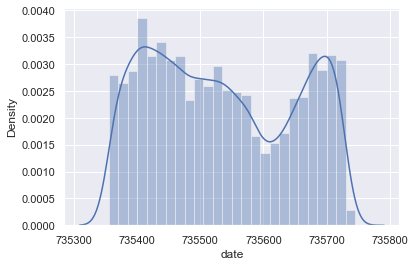

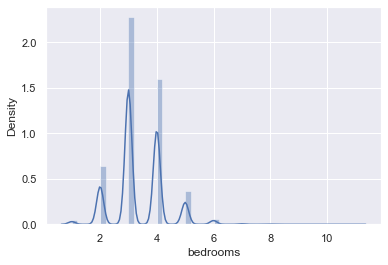

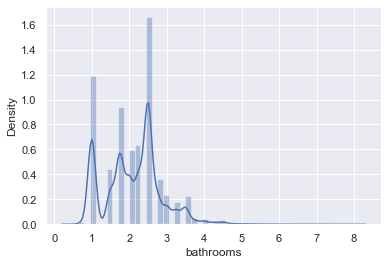

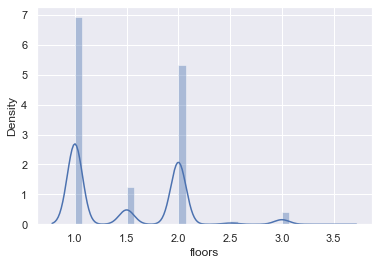

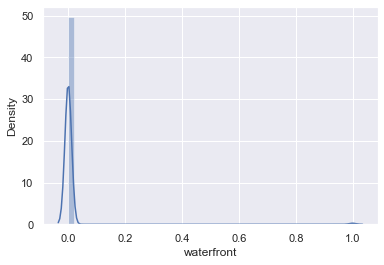

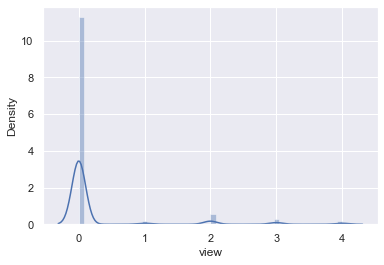

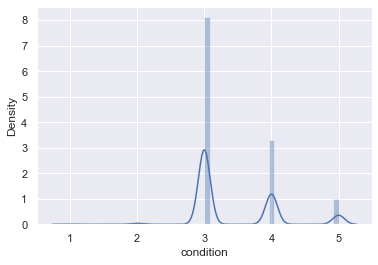

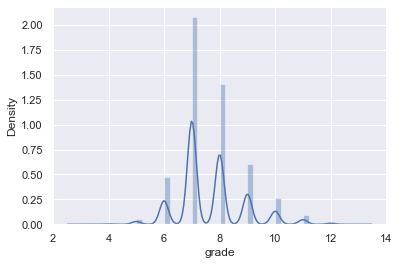

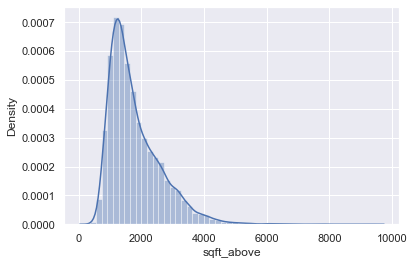

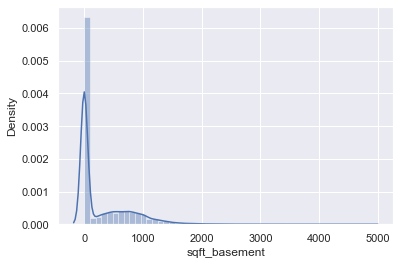

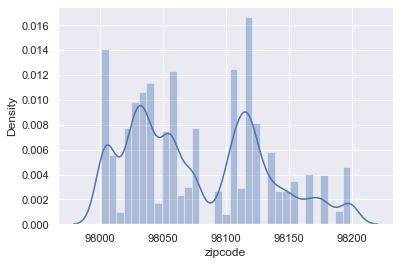

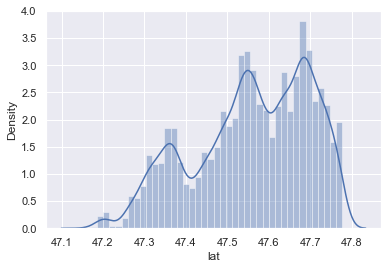

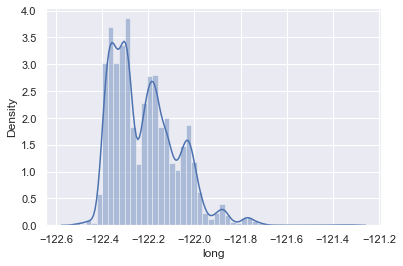

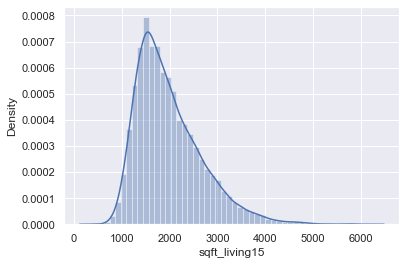

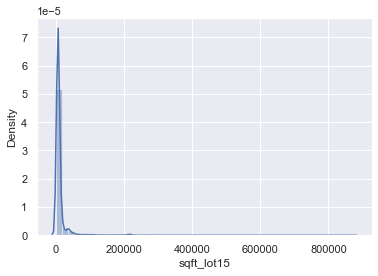

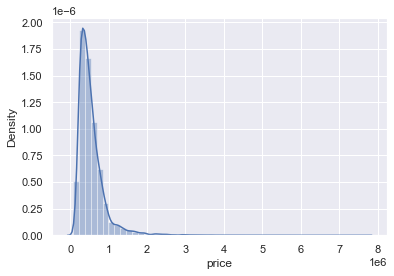

In [136]:
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

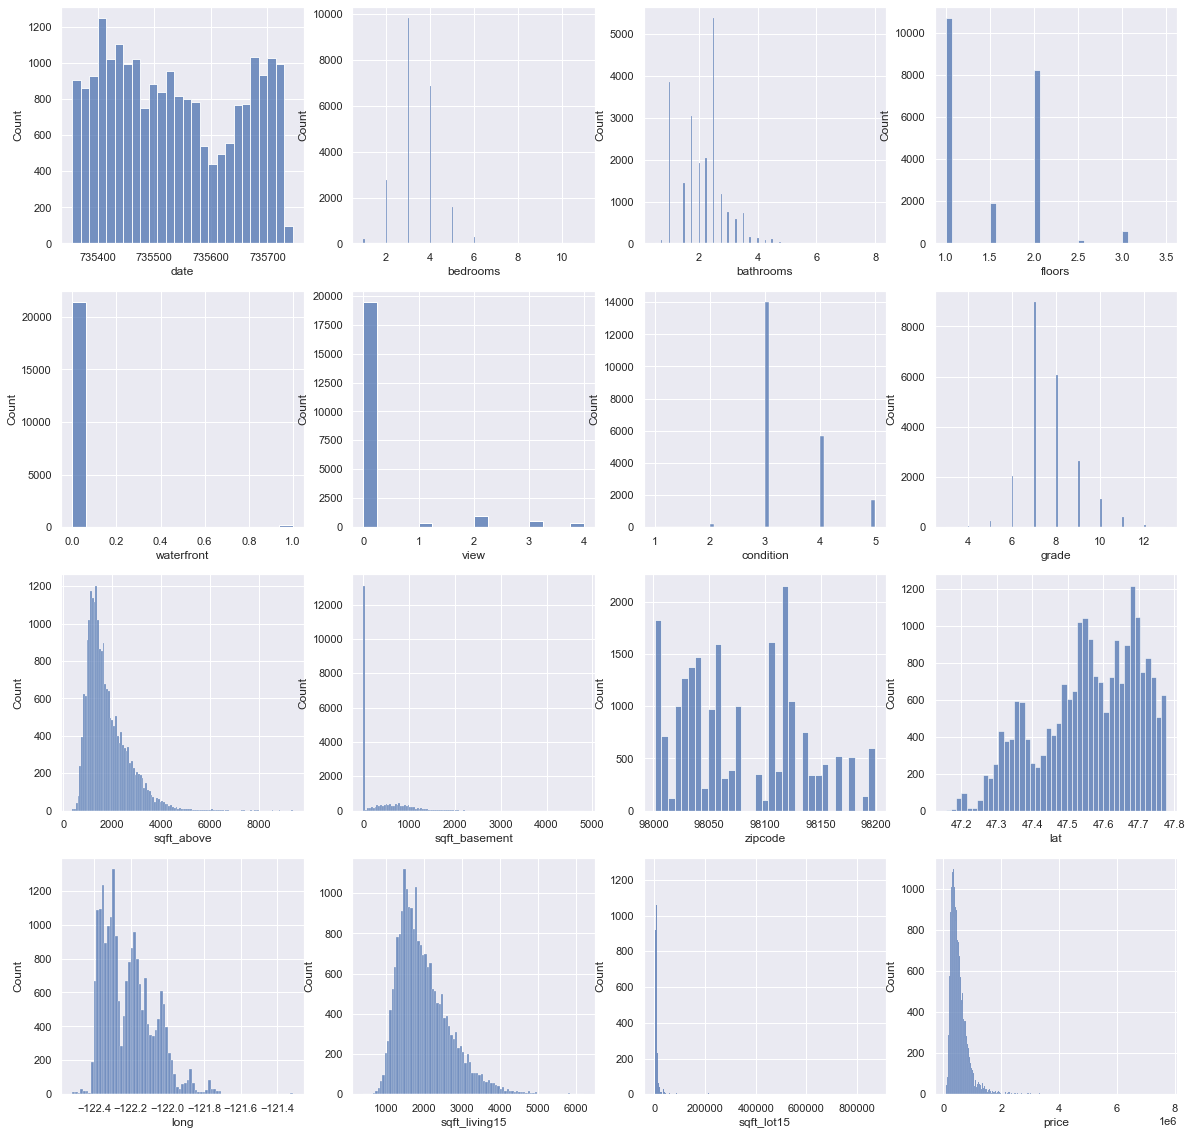

In [139]:
# Plot histograms for every numerical column
plt.figure(figsize=(20,20))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(numerical[column]);

In [140]:
#Barplot for every categorical column
for i in categorical:
    plt.figure(figsize=(6,6))
    plt.bar(df[i].unique(), data[i].value_counts(), color="green")
    plt.title(i)
    plt.show();

Check for multicolinearity

In [ ]:
#plot correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 6. Machine Learning Model

Now we will use the Scikit-Learn library and the workflow as follows, to get a model with a good performance.

First Model: Linear Regression

Let's train the model now, before applying any pre-processing method.

In [75]:
#import linear-model from scikit-learn and evaluation metrics, and math library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [76]:
#create a Linear Regression object using the constructor:
lm = LinearRegression()

In this case study, we want to build a ML model to predict the prices of properties based on some different features, so our target variable is the price column. The features are the rest of columns of our df, as we have already dropped the irrelevant columns.

In [77]:
#define the predictor and the target variable 
X = data.drop(columns=['price'])
Y = data['price']
X


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,quarter
0,735519,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,10,4
1,735576,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,12,4
2,735654,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2,1
3,735576,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,12,4
4,735647,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,735374,3,2.50,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,5,2
21593,735652,4,2.50,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,2,1
21594,735407,2,0.75,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,6,2
21595,735614,3,2.50,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,1,1


In [78]:
#check the shapes of both X, Y (because should have both the same number of rows)
print('X shape:', X.shape)
print('Y shape:', Y.shape)


X shape: (21597, 17)
Y shape: (21597,)


Split into train - test

In [79]:
from sklearn.model_selection import train_test_split

We will use a random_state of 40, and a test_sizeof 0.40 ( 60% train, 40% test)

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=40)

In [81]:
#train the model
model = lm.fit(X_train,Y_train)

In [82]:
#Fit over our train data and predict against X test features
Y_pred= lm.predict(X_test)


Evaluate our model accuracy over Y_test- with metrics such as :

R2 : regression score function.
MSE: Mean Squared Error
RMSE : Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
MAE : Mean Absolute Error

In [83]:
print('R2: ', r2_score(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MAE: ', mae(Y_test, Y_pred))

R2:  0.6833064126233885
MSE: 43199501769.15031
RMSE:  207844.89834766285
MAE:  131070.15324397202


Our accuracy score R2 now is 68,33%, it is relatively close to 1, and the mean absolute error is 131,070 $ so the model performs well.

Checking if we can improve close to 1

# 7. Pre-processing the data

In [84]:
data = data.drop(['lat', 'long'], axis=1)

In [85]:
data.describe()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,735535.180997,3.371811,2.115826,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,98077.951845,1986.620318,12758.283512,5.402966e+05
std,113.059987,0.904096,0.768984,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,53.513072,685.230472,27274.441950,3.673681e+05
min,735355.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,399.000000,651.000000,7.800000e+04
25%,735436.000000,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,1490.000000,5100.000000,3.220000e+05
50%,735522.000000,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,1840.000000,7620.000000,4.500000e+05
75%,735646.000000,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,2360.000000,10083.000000,6.450000e+05
max,735745.000000,11.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,7.700000e+06


We need to rescale, as we have different range of values in columns.

# Standardization

We want to standardise all numeric features so we need first to get the numeric features of the new df.

In [86]:
num = data._get_numeric_data()
X_num = num.drop(columns=['price'])

In [87]:
# rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
X_stan = transformer.transform(X_num)
print(X_stan.shape)


(21597, 13)


In [88]:
X_stan

array([[-0.143122  , -0.41126094, -1.45107268, ...,  1.86964543,
        -0.94367562, -0.26062671],
       [ 0.36104681, -0.41126094,  0.17448579, ...,  0.87921029,
        -0.43288674, -0.18769961],
       [ 1.05096203, -1.51736336, -1.45107268, ..., -0.93347288,
         1.07029196, -0.17219022],
       ...,
       [-1.1337695 , -1.51736336, -1.77618438, ...,  1.23427195,
        -1.41068259, -0.39419807],
       [ 0.69715935, -0.41126094,  0.49959749, ..., -0.95216033,
        -0.84151784, -0.42059702],
       [-0.12543187, -1.51736336, -1.77618438, ...,  1.23427195,
        -1.41068259, -0.41803046]])

# Normalization

We will preprocess now the categoricals using the OneHotEncoder method

In [89]:
#store categorical features in a new X_cat
X_cat = data.select_dtypes(include = np.object)

In [90]:
from sklearn.preprocessing import OneHotEncoder
X_enc = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
X_enc = X_enc.transform(X_cat).toarray()
X_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Second modelling, now after pre-processing

Now we concatenate both standardized and encoded dataframes in order to get the X for the model.

In [91]:
X = np.concatenate((X_stan, X_enc), axis= 1)

Spliting the data into train and test randomly

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [92]:
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
Y_pred  = lm.predict(X_test)

Additional Evaluation Metrics for LR

In [93]:
print('R2: ', r2_score(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MAE: ', mae(Y_test, Y_pred))


R2:  0.6833064126233885
MSE: 43199501769.15031
RMSE:  207844.89834766285
MAE:  131070.15324397202


no changes

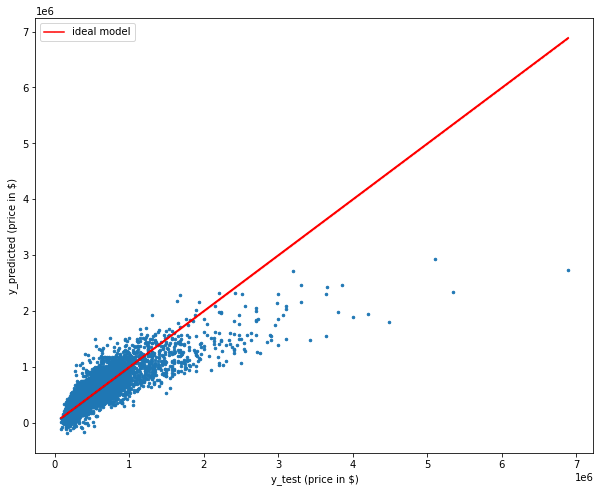

In [94]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(Y_test), max(Y_test), num=len(Y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(Y_test, Y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

# Third model

Another iteration now dealing with outliers. First, we will plot the numerical features to find the outliers.

In [95]:
#create a new df3 to apply in this part 
data = data
num = data._get_numeric_data()
X_num = num.drop(columns=['price'])


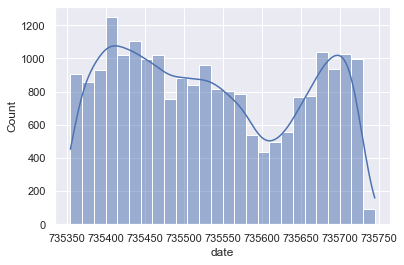

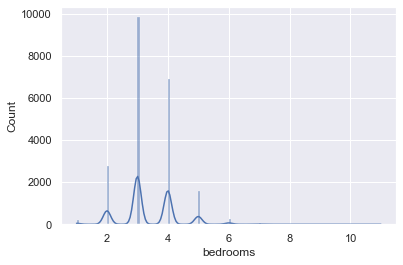

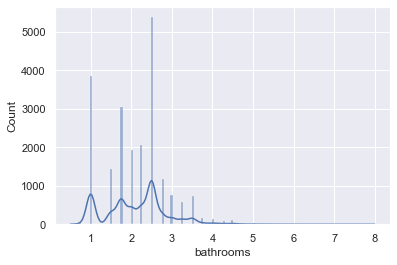

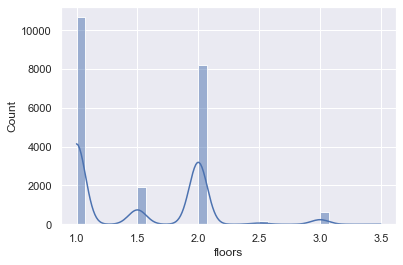

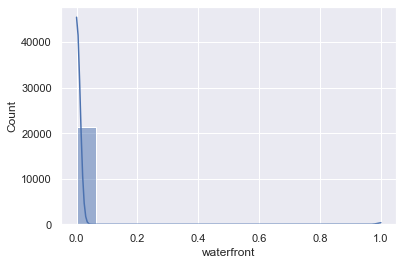

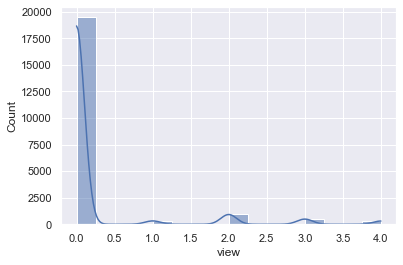

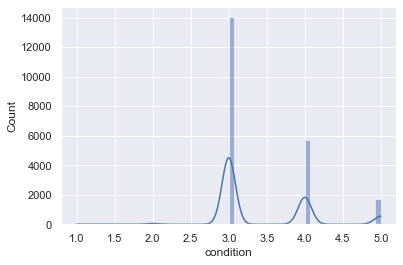

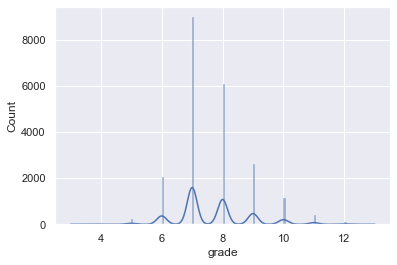

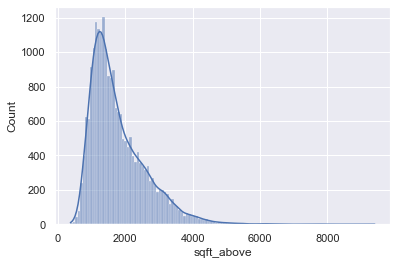

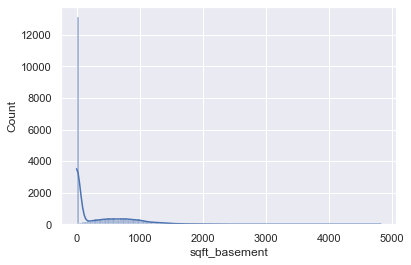

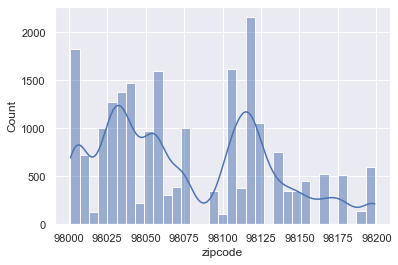

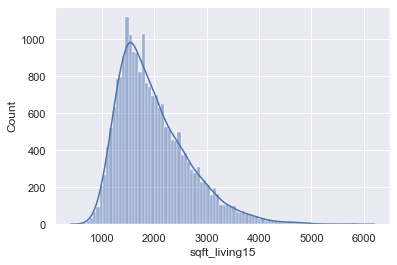

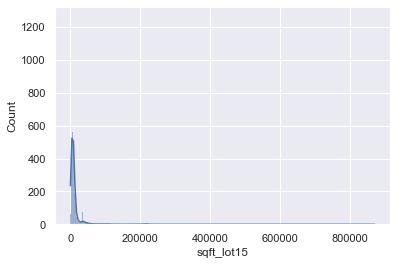

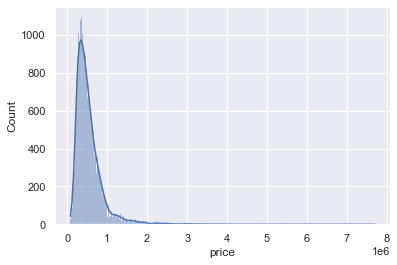

In [96]:
#histogram for every numerical column
for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.set_theme(style="darkgrid")
    sns.histplot(data=num, x=col, kde=True)

Logarithm transformation

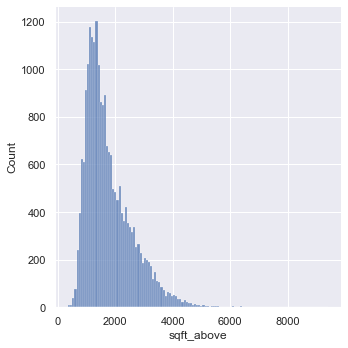

In [97]:
sns.displot(data['sqft_above'])

In [98]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN   

In [99]:
#replace the NaN with the mean
data['sqft_above_log'] = list(map(log_transfom_clean_, data['sqft_above']))
data['sqft_above_log'] = data['sqft_above_log'].fillna(np.mean(data['sqft_above_log']))


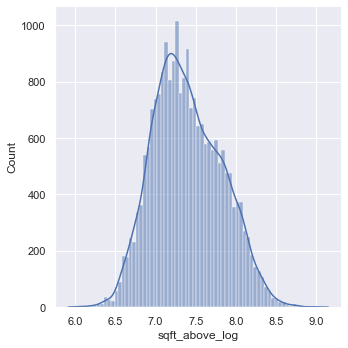

In [100]:
sns.displot(data['sqft_above_log'], kde=True);

In [101]:
data['sqft_basement_log'] = list(map(log_transfom_clean_, data['sqft_basement']))
data['sqft_basement_log'] = data['sqft_basement_log'].fillna(np.mean(data['sqft_basement_log']))


In [102]:
data['sqft_living15_log'] = list(map(log_transfom_clean_, data['sqft_living15']))
data['sqft_living15_log'] = data['sqft_living15_log'].fillna(np.mean(data['sqft_living15_log']))

In [103]:
data.head()


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,month,quarter,sqft_above_log,sqft_basement_log,sqft_living15_log
0,735519,3,1.00,1.0,0,0,3,7,1180,0,98178,1340,5650,221900,10,4,7.073270,6.439042,7.200425
1,735576,3,2.25,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,12,4,7.682482,5.991465,7.432484
2,735654,2,1.00,1.0,0,0,3,6,770,0,98028,2720,8062,180000,2,1,6.646391,6.439042,7.908387
3,735576,4,3.00,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,12,4,6.956545,6.813445,7.215240
4,735647,3,2.00,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,2,1,7.426549,6.439042,7.495542


In [104]:
data = data.drop(['sqft_above'], axis=1)
data = data.drop(['sqft_basement'], axis =1)
data = data.drop(['sqft_living15'], axis=1)

Normalizer

In [105]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [106]:
X_num = X_num.drop(['price'], axis=1)

In [107]:
X_enco=pd.get_dummies(X_cat, drop_first=True)
X_enco.head()


,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Concatenate



In [108]:
X = np.concatenate((X_num, X_enco), axis= 1)
Y = data['price']
print(X.shape)
print(Y.shape)


(21597, 27)
(21597,)


In [109]:
#spliting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [110]:
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
Y_pred  = lm.predict(X_test)

In [111]:
print('R2: ', r2_score(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MAE: ', mae(Y_test, Y_pred))


R2:  0.5712736040374553
MSE: 57552620839.33104
RMSE:  239901.2731090251
MAE:  157768.76195675367


Applying the logarithm transformation the model performance has decreased slightly, to a R2 of 57% and a mean absolute error of 157768 $.

Let's plot our model results.

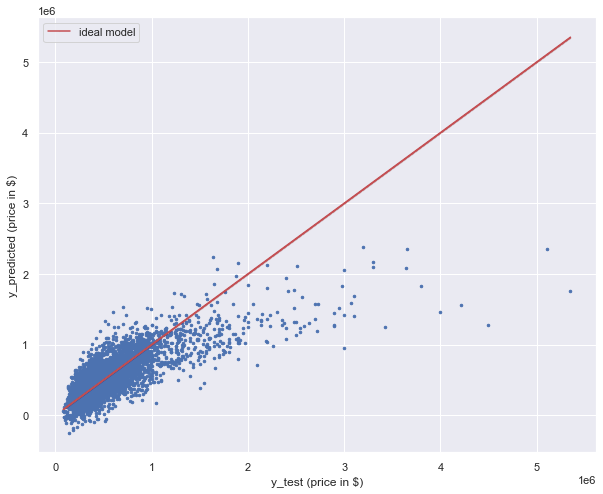

In [112]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(Y_test), max(Y_test), num=len(Y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(Y_test, Y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

# Fourth modelling: using KNN

Standardize numerical columns

In [146]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)
data.zipcode.dtypes

dtype('int64')

In [148]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)
numericals.dtypes

date                   int64
bedrooms               int64
bathrooms            float64
floors               float64
waterfront             int64
view                   int64
condition              int64
grade                  int64
zipcode                int64
sqft_lot15             int64
price                  int64
sqft_above_log       float64
sqft_basement_log    float64
sqft_living15_log    float64
dtype: object

In [149]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)
categoricals.dtypes

month      object
quarter    object
dtype: object

In [120]:
#Scaling to the numerical columns except the final column ('price')
transformer = StandardScaler().fit(numericals.iloc[:,:-1])
scaled_numericals = transformer.transform(numericals.iloc[:,:-1])

In [121]:
pdscaled_numericals= pd.DataFrame(scaled_numericals,columns=numericals.columns.tolist()[:-1])

In [122]:
pdscaled_numericals.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_lot15,price,sqft_above_log,sqft_basement_log
0,-0.143122,-0.411261,-1.451073,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,1.869645,-0.260627,-0.866716,-0.753583,0.000000
1,0.361047,-0.411261,0.174486,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,0.879210,-0.187700,-0.006252,0.672709,-1.121310
2,1.050962,-1.517363,-1.451073,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,-0.933473,-0.172190,-0.980773,-1.752995,0.000000
3,0.361047,0.694841,1.149821,-0.915552,-0.087205,-0.305715,2.444427,-0.560800,1.084772,-0.284459,0.173409,-1.026858,0.937985
4,0.989047,-0.411261,-0.150626,-0.915552,-0.087205,-0.305715,-0.629986,0.291589,-0.073850,-0.192686,-0.082471,0.073516,0.000000


Dummifying categorical columns

In [123]:
cat_encoded = pd.get_dummies(categoricals, drop_first=True)
cat_encoded.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Concatenate



In [124]:
full = pd.concat([pdscaled_numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
full.shape

(21597, 27)

In [125]:
full_x = pd.DataFrame(full,columns=full.columns.tolist()[:-1])
full_x.head()


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_lot15,price,sqft_above_log,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4
0,-0.143122,-0.411261,-1.451073,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,1.869645,-0.260627,-0.866716,-0.753583,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.361047,-0.411261,0.174486,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,0.879210,-0.187700,-0.006252,0.672709,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1.050962,-1.517363,-1.451073,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,-0.933473,-0.172190,-0.980773,-1.752995,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.361047,0.694841,1.149821,-0.915552,-0.087205,-0.305715,2.444427,-0.560800,1.084772,-0.284459,0.173409,-1.026858,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.989047,-0.411261,-0.150626,-0.915552,-0.087205,-0.305715,-0.629986,0.291589,-0.073850,-0.192686,-0.082471,0.073516,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
X = full_x
y = data['price']

Splitting data intro train and test sets.



In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Training the K-NN model

In [128]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=8) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train) 

KNeighborsRegressor(n_neighbors=8)

In [129]:
knn_model.score(X_test,y_test)

0.9127457443925724

Getting our predictions and metrics

In [130]:
knn_pred = knn_model.predict(X_test)

In [131]:
print('R2: ', r2_score(y_test, knn_pred))
print('MSE:', mean_squared_error(y_test, knn_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, knn_pred)))
print('MAE: ', mae(y_test,knn_pred))

R2:  0.9127457443925724
MSE: 11713090532.524797
RMSE:  108227.03235571415
MAE:  78370.17731481482


The R2 of the KNN model is around 91% with a mean absolute error of 78370 $, so this model performs better than the linear regression we did before.

Plot our model results.

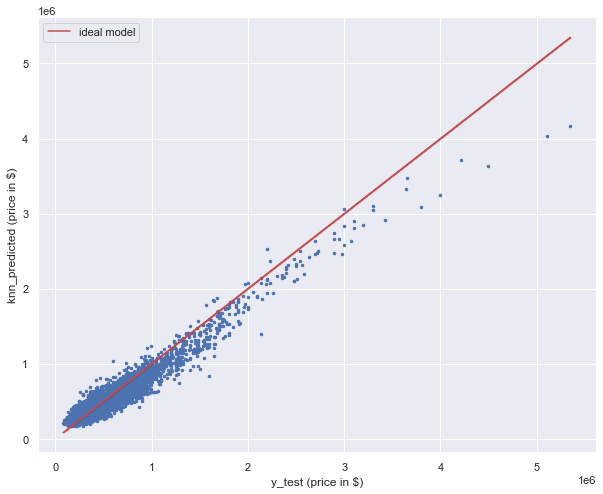

In [132]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, knn_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('knn_predicted (price in $)');